<a href="https://colab.research.google.com/github/natsakh/IAD/blob/main/Pr_5/5_3_NonLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch, numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import random

np.random.seed(42)
torch.manual_seed(42)
random.seed(42)

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cpu


In [2]:
# Synthetic nonlinear data: y = x + 0.3*sin(2πx) + noise
N = 1000
X = np.random.uniform(0., 1., (N, 1)).astype(np.float32)
noise = np.random.uniform(-0.1, 0.1, (N, 1)).astype(np.float32)
Y = X + 0.3 * np.sin(2 * np.pi * X) + noise

# Convert to tensors
X = torch.from_numpy(X)
Y = torch.from_numpy(Y)

X, Y = X.to(device), Y.to(device)

In [3]:
class NonLinReg(nn.Module):
    def __init__(self):
        super().__init__()

        self.layers = nn.Sequential(
            nn.Linear(1, 10),
            nn.Sigmoid(),
            nn.Linear(10, 10),
            nn.Sigmoid(),
            nn.Linear(10, 10),
            nn.Sigmoid(),
            nn.Linear(10, 1))

    def forward(self, x):
        return(self.layers(x))

model = NonLinReg()
model = model.to(device)
print(model)

NonLinReg(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=10, out_features=1, bias=True)
  )
)


In [4]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

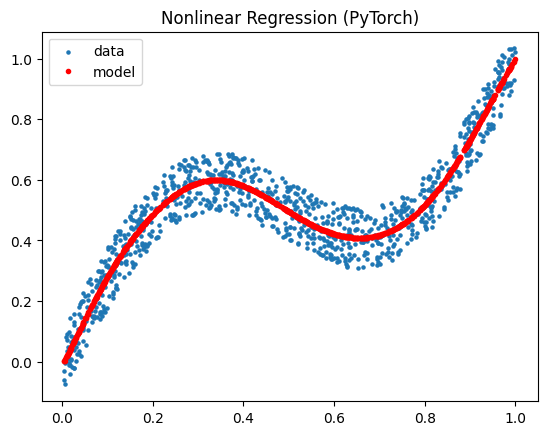

In [5]:
# Training loop
epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()
    pred = model(X)
    loss = criterion(pred, Y)
    loss.backward()
    optimizer.step()

# Plot results
with torch.no_grad():
    y_pred = model(X).numpy()

plt.scatter(X, Y, s=5, label="data")
plt.plot(X, y_pred, ".",color="red", label="model")
plt.legend()
plt.title("Nonlinear Regression (PyTorch)")
plt.show()


In [6]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.numel())

layers.0.weight 10
layers.0.bias 10
layers.2.weight 100
layers.2.bias 10
layers.4.weight 100
layers.4.bias 10
layers.6.weight 10
layers.6.bias 1
